# No comments / code are final

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# This is for the plots not being cut off
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Data Cleaning

### What are the stats?

1. Sleep
    * Time in bed(hr)
    * The sleep data was collected on my iphone and it tracked everytime after 10pm that I stopped using my phone for more than 15 minutes
    * Something to keep in mind is that the sleep time is reset whenever I picked up my phone
1. Audio
    * Headphone sound levels(dBASPL)
    * The audio data was collected on my iphone at random intervals and it would keep track of the current decibal levels (db)
1. Movement
    * Distance walking / running(mi)
        * The amount of miles I traversed in a specific day
    * Flights climbed(count)
        * The amount of flights of stairs I climbed
    * Step count(count)
        * The amount of steps I took in a given day

### My proccess of Data Cleaning

* Import the values into either series or dataframes
* Convert the values to the right datatype
    * The movement data will not be altered
    * Any sleep data that is less than half an hour is considered a nap and will not included
    *  For audio i will take the average for each day since the data was collected at random intervals

1. Why it the domain important to you and why you are researching in this domain
    * I am curious about the difference between in school and out of school for my movement, and since I have the option to do sleep and headphone volume I thought it would be interesting to explore them.
1. What is the dataset format (e.g. CSV files, JSON files, a mix of the two, etc.)
    * all three datasets are in .csv files
1. What tables are included in the dataset and how is the data in each table collected
    * All data is collected from my iPhone (see `What are the stats?` for each of the attributes)
1. Include a brief description of the attributes
    * See `What are the stats?`
1. What are you trying to classify in the dataset
    * I want to clearly show the difference in physical activity during the summer. Adding onto that I want to see if there is a differnce between my physical activity/headphone usage/sleep schedule during the weekdays versus the weekend.
1. What are potential impacts of the results
    * Headphone saftey:
        * If I notice that I listen to louder music during a specific time of the year, I can look out for that and notice and turn down the volume
    * Sleep schedule:
        * If I notice that I get way less sleep on the weekdays, it can allow for me to plan my week better and allow for me to get a consistent amount of sleep on both the weekend and weekdays
    * Physical activity:
        * The main reason for this project would be for me to visually see just how much less activities I did over the summer since my job was a delivery driver
1. Who are stakeholders interested in your results
    * Me
    * Maybe my doctors who would want to monitor my sleep schedule or physical activities

## Movement

In [2]:
movement_data = pd.Series(dtype=float)
movement_data = pd.read_csv("original_data/puryear_movement.csv", index_col=0)
movement_data.to_csv("data/cleaned_puryear_movement.csv")

print(movement_data)

            Distance walking / running(mi)  Flights climbed(count)  \
Date                                                                 
2020-11-21                           1.023                     5.0   
2020-11-22                           1.202                     2.0   
2020-11-23                           2.455                     8.0   
2020-11-24                           1.165                     4.0   
2020-11-25                           2.444                     3.0   
...                                    ...                     ...   
2021-11-17                           2.624                     7.0   
2021-11-18                           4.532                     7.0   
2021-11-19                           3.492                    10.0   
2021-11-20                           0.507                     4.0   
2021-11-21                           0.004                     0.0   

            Step count(count)  
Date                           
2020-11-21           2471

## Audio

format = `%YYYY-%MM-%DD %HH:%MM:%%SS - %YYYY-%MM-%DD %HH:%MM:%%SS,%DB_Val`

In [3]:
audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("original_data/puryear_audio.csv")

# idea for repeating values, find the daily average

audio_data_cleaned = pd.Series(dtype=float)

for i in range(len(audio_data)):
    audio_data_date_string = audio_data.iloc[i]["Date"]
    cropped_audio_date_string = audio_data_date_string[0:19]
    audio_data_cleaned[cropped_audio_date_string] =  audio_data.iloc[i]["Headphone sound levels(dBASPL)"]

In [4]:
audio_data_cleaned = audio_data_cleaned.reset_index()
audio_data_cleaned.columns=["Unnamed: 0","0"]

## Combining the dates of the audio

In [5]:
audio_data_cleaned_again = pd.Series(dtype=float)

# finding the average of the daily values
sum = 1
amount = audio_data_cleaned.iloc[0][1]
audio_data_cleaned_prev_date = audio_data_cleaned.iloc[0][0][0:10]

# yes this works!
for i in range(1,len(audio_data_cleaned)):
    audio_data_cleaned_date = audio_data_cleaned.iloc[i][0][0:10]
    if audio_data_cleaned_date == audio_data_cleaned_prev_date: # if this date is the same as the day before do this
        sum = sum + 1
        amount = amount + audio_data_cleaned.iloc[i][1]
    else: # otherwise reset all the values and continue
        sum = 1
        amount = audio_data_cleaned.iloc[i][1]
        audio_data_cleaned_prev_date = audio_data_cleaned.iloc[i][0][0:10]
        audio_data_cleaned_again[audio_data_cleaned_date] = (amount / sum)

In [6]:
audio_data_cleaned = pd.DataFrame(audio_data_cleaned_again)
audio_data_cleaned.columns = ["Headphone sound levels(dBASPL)"]
audio_data_cleaned.rename_axis("Date",inplace=True)
audio_data_cleaned.to_csv("data/cleaned_puryear_audio.csv")

print(audio_data_cleaned)

            Headphone sound levels(dBASPL)
Date                                      
2020-11-22                          66.064
2020-11-23                          61.650
2020-11-24                          54.927
2020-11-25                          57.506
2020-11-26                          39.405
...                                    ...
2021-11-17                          65.809
2021-11-18                          62.816
2021-11-19                          57.094
2021-11-20                          59.618
2021-11-21                          60.938

[363 rows x 1 columns]


### Function that combines the days

In [7]:
def combine_days_in_ser(original_series):
    # finding the average of the daily values
    sum = 1
    amount = original_series.iloc[0][1]
    prev_date = original_series.iloc[0][0][0:10]

    cleaned_series = pd.Series(dtype=float)

    # print(len(original_series))
    # yes this works!
    for i in range(1,len(original_series)):
        original_series_date = original_series.iloc[i][0][0:10]
        if original_series_date == prev_date: # if this date is the same as the day before do this
            sum = sum + 1
            amount = amount + original_series.iloc[i][1]
        else: # otherwise reset all the values and continue
            sum = 1
            amount = original_series.iloc[i][1]
            prev_date = sleep_data_cleaned.iloc[i][0][0:10]
            cleaned_series[original_series_date] = amount

    return cleaned_series

## Sleep

Format = `%YYYY-%MM-%DD %HH:%MM:%%SS - %YYYY-%MM-%DD %HH:%MM:%%SS,%DB_Val`

In [8]:
sleep_data = pd.Series(dtype=float)

sleep_data = pd.read_csv("original_data/puryear_sleep.csv")

# i notice how whenever there is a super small one, its always after a longer one.
# my theory is that that is when i actually pick up my phone first, but then i put it down.
# maybe i hit snooze

# first thing i am going to do is see if i can get the first value before the -, i feel like the stuff after the dash is not needed since we will have the value

sleep_data_cleaned = pd.Series(dtype=float)

for i in range(len(sleep_data)):
    current_date_string = sleep_data.iloc[i]["Date"]
    cropped_date_string = current_date_string[0:19]
    sleep_data_cleaned[cropped_date_string] =  sleep_data.iloc[i]["Time in bed(hr)"]

# i am just going to drop the time if it is less than 0.5 hours (half an hour)
sleep_data_cleaned = sleep_data_cleaned[sleep_data_cleaned>0.5]


In [9]:
# #sleep_data_cleaned = pd.read_csv("data/temporary_sleep.csv")
# sleep_data_cleaned = pd.DataFrame(combine_days_in_ser(sleep_data_cleaned.reset_index()))
sleep_data_cleaned = sleep_data_cleaned.reset_index()
sleep_data_cleaned.columns=["Unnamed: 0","0"]
sleep_data_cleaned = combine_days_in_ser(sleep_data_cleaned)
print(sleep_data_cleaned)

2020-11-23    6.531
2020-11-24    4.332
2020-11-25    6.544
2020-11-26    8.158
2020-11-27    5.264
              ...  
2021-11-17    7.020
2021-11-18    4.149
2021-11-19    7.006
2021-11-20    4.853
2021-11-21    6.994
Length: 301, dtype: float64


In [10]:
sleep_data_cleaned = pd.DataFrame(sleep_data_cleaned)
sleep_data_cleaned.columns =["Time in bed(hr)"]
sleep_data_cleaned.rename_axis("Date",inplace=True)

sleep_data_cleaned.to_csv("data/cleaned_puryear_sleep.csv")

print(sleep_data_cleaned)

            Time in bed(hr)
Date                       
2020-11-23            6.531
2020-11-24            4.332
2020-11-25            6.544
2020-11-26            8.158
2020-11-27            5.264
...                     ...
2021-11-17            7.020
2021-11-18            4.149
2021-11-19            7.006
2021-11-20            4.853
2021-11-21            6.994

[301 rows x 1 columns]


# EDA

1. What cleaning of the dataset did you need to perform(e.g.. are there missing values and how did you handle the missing values)
    * The main thing that I am doing is finding a good way to combine the multiple sleep data points.  
        * I could wake up and use my phone from 1 to even 4 times in a single night, be it not being able to sleep or checking the time
1. How are you merging the tables
    * I am merging the tables based off of their date, and later the day of the week
1. What are challenges with data preparation
    * The main challange was with combining multiple sleep data points, since there could be multiple logs for the same "sleep session", but those logs could be from different days:
        * e.g. sunday at 11:32pm i slept for 33 minutes and the next dataset is monday at 12:05am
        * Even though these data points are from different days, they are still back to back and part of the same "nights sleep"
1. What data aggregation techniques are you applying
    * Making sure everything is labeled 
    * Adding day of the week
    * Cleaning up invalid sleep data points (less than half an hour)
1. What visualizations informatively present the attributes and relationships
    * A line graph is perfect for visualizing the graphs, especially since it is based off of the date
1. What statistical hypothesis tests are you computing
    * My hypothesis is that there is no difference between the weekend and weekdays for the amount of sleep i get / audio levels / and movement
        * This might sound weird but I like to think I keep a consistent sleep schedule

## Graphs

### Combine all 3 dataframes 

In [11]:
movement_data = pd.DataFrame(dtype=float)
movement_data = pd.read_csv("data/cleaned_puryear_movement.csv",index_col=0)

audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("data/cleaned_puryear_audio.csv",index_col=0)
# audio_data.columns = ["Date","Headphone sound levels(dBASPL)"]

sleep_data = pd.DataFrame(dtype=float)
sleep_data = pd.read_csv("data/cleaned_puryear_sleep.csv",index_col=0)
# sleep_data.columns = ["Date","Time in bed(hr)"]

In [12]:
sleep_and_audio_data = pd.merge(sleep_data,audio_data,on="Date")
all_data = pd.merge(sleep_and_audio_data,movement_data, on="Date")

### Movement

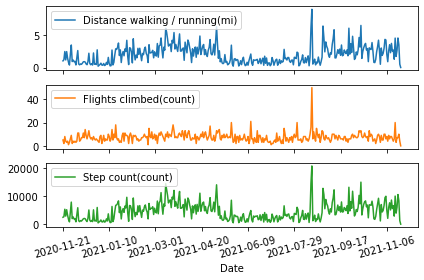

In [13]:
ax = movement_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/movement_graph.jpg",dpi=500)

### Audio

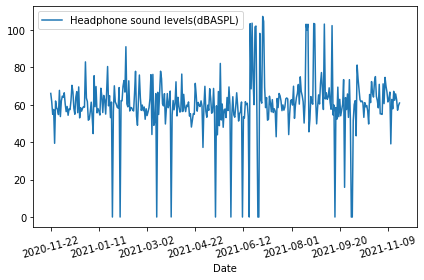

In [14]:
ax = audio_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/audio_graph.jpg",dpi=500)

### Sleep

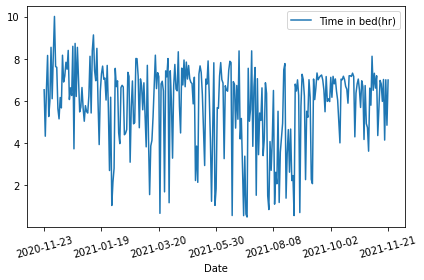

In [15]:
ax = sleep_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/sleep_graph.jpg",dpi=500)

### All Data

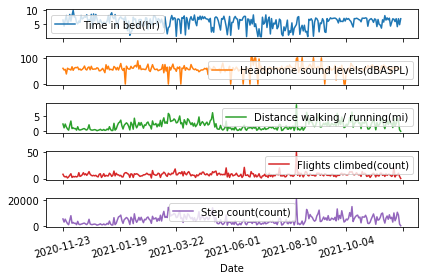

In [16]:
ax = all_data.plot(subplots=True,rot=15)
fig = ax[0].get_figure()
fig.savefig("figures/combined_graph.jpg",dpi=500)

### Combined Graph
<img src="figures\combined_graph.jpg?" width="600"/>

## Interpolate data for VISUAL analysis

In [17]:
# making new dataframes
movement_data = pd.DataFrame(dtype=float)
movement_data = pd.read_csv("data/cleaned_puryear_movement.csv")

audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("data/cleaned_puryear_audio.csv")
audio_data.columns = ["Date","Headphone sound levels(dBASPL)"]

sleep_data = pd.DataFrame(dtype=float)
sleep_data = pd.read_csv("data/cleaned_puryear_sleep.csv")
sleep_data.columns = ["Date","Time in bed(hr)"]

### Audio

In [18]:
# interpolate audio data
audio_data.mask((audio_data["Headphone sound levels(dBASPL)"] <= 30) & (audio_data["Headphone sound levels(dBASPL)"] <= 100),inplace=True) # filtering out the outliers
audio_data.interpolate(method="cubic",inplace=True)
audio_data.fillna(method="bfill",inplace=True)

In [19]:
audio_data_combined = audio_data.merge(audio_data["Headphone sound levels(dBASPL)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
audio_data_combined.columns=["Date","Headphone sound levels(dBASPL)","Headphone sound levels(dBASPL) MOVING AVERAGE"]

audio_data_combined.set_index("Date",inplace=True)

audio_data_combined.to_csv("data/cleaned_puryear_audio_ewm.csv")

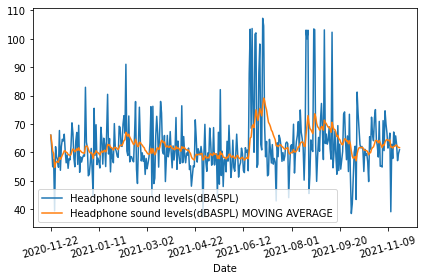

In [20]:
ax = audio_data_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_audio_graph.jpg",dpi=500)

<img src="figures\moving_avg_audio_graph.jpg?" width="600"/>

### Sleep

In [21]:
# interpolate sleep data
sleep_data.interpolate(method="cubic",inplace=True)
sleep_data.fillna(method="bfill",inplace=True)

In [22]:
sleep_data_combined = sleep_data.merge(sleep_data["Time in bed(hr)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
sleep_data_combined.columns=["Date","Time in bed(hr)","Time in bed(hr) MOVING AVERAGE"]

sleep_data_combined.set_index("Date",inplace=True)

sleep_data_combined.to_csv("data/cleaned_puryear_sleep_ewm.csv")

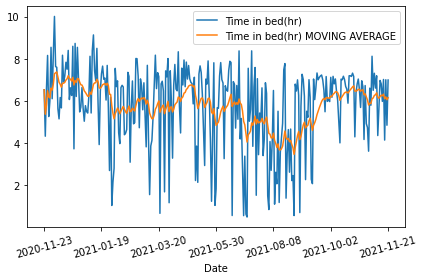

In [23]:
ax = sleep_data_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_sleep_graph.jpg",dpi=500)

<img src="figures\moving_avg_sleep_graph.jpg?" width="600"/>

### Movement

In [24]:
# interpolate movement data
movement_data.interpolate(method="cubic",inplace=True)
movement_data.fillna(method="bfill",inplace=True)

movement_data_distance = pd.DataFrame(movement_data["Distance walking / running(mi)"])
movement_data_flights = pd.DataFrame(movement_data["Flights climbed(count)"])
movement_data_step = pd.DataFrame(movement_data["Step count(count)"])

In [25]:
# reset indexes
movement_data_distance.set_index(movement_data["Date"],inplace=True)
movement_data_flights.set_index(movement_data["Date"],inplace=True)
movement_data_step.set_index(movement_data["Date"],inplace=True)

# create the combined datasets
movement_data_distance_combined = movement_data_distance.merge(movement_data_distance["Distance walking / running(mi)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_flights_combined = movement_data_flights.merge(movement_data_flights["Flights climbed(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_step_combined = movement_data_step.merge(movement_data_step["Step count(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)


In [26]:
# rename the columns
movement_data_distance_combined.columns=["Distance walking / running(mi)","Distance walking / running(mi) MOVING AVERAGE"]
movement_data_flights_combined.columns=["Flights climbed(count)","Flights climbed(count) MOVING AVERAGE"]
movement_data_step_combined.columns=["Step count(count)","Step count(count) MOVING AVERAGE"]

In [27]:
# output to csv
movement_data_distance_combined.to_csv("data/clean_puryear_movement_distance_ewm.csv")
movement_data_flights_combined.to_csv("data/clean_puryear_movement_flights_ewm.csv")
movement_data_step_combined.to_csv("data/clean_puryear_movement_step_ewm.csv")

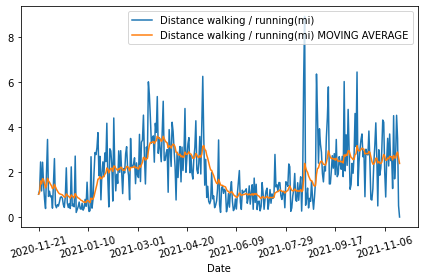

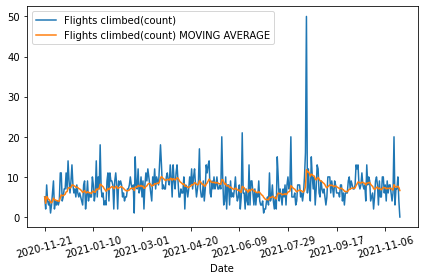

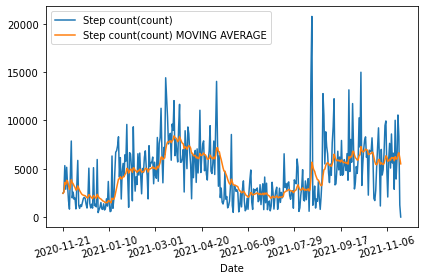

In [28]:
# create and output plots
ax = movement_data_distance_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_distance_graph.jpg",dpi=500)

ax = movement_data_flights_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_flights_graph.jpg",dpi=500)

ax = movement_data_step_combined.plot(rot=15)
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_steps_graph.jpg",dpi=500)

## Observations

* The first thing that sticks out is how obvious it is when I am at school vs home.
    * The step count decreases alot during the summer
    * The distance walking / running decreases during the summer
* On the 17th of August there is a large spike for flights climbed
    * This was when a friend was visiting and we went hiking
* There is a very clear dip in my sleep during late July and early August
* Early June there is an extremly large spike in db for the headphone sound levels
    * This is most likely because it was around that time that I started my job as a delivery driver
* There is a clear difference between the first half of Spring 2020 and the second half for distance walking / running
    * This is most likely because early March I started dating someone who lived across the campus



# Hypothesis / Testing

## T-test

##### The subject has exported his iPhones movement data, as well as his sleep and headphone volume data. Using a level of significance of 0.1, is there any major difference between the data for the weekdays vs the weekends?
* Null Hypothesis:
    * There is no significant difference: $\alpha \le 0.1$
* Alternate Hypothesis:
    * There is a significant difference: $\alpha \gt 0.1$

In [29]:
# return the date of the week of a given date in the format of 'YYYY-MM-DD'
def get_weekday(date):
    return pd.to_datetime(date).strftime('%A')

audio_df = pd.read_csv("data/cleaned_puryear_audio.csv",index_col=0)
movement_df = pd.read_csv("data/cleaned_puryear_movement.csv",index_col=0)
sleep_df = pd.read_csv("data/cleaned_puryear_sleep.csv",index_col=0)

In [30]:
def return_dataframe_of_weekend(df):
    df = df.reset_index()
    weekday_df = pd.DataFrame()
    weekday_df['Weekday'] = df['Date'].apply(get_weekday)
    df = df.join(weekday_df)
    sunday_and_saturday_df = df[df['Weekday'] == 'Sunday'].append(df[df['Weekday'] == 'Saturday']) # append the dataframe of all weekends
    sunday_and_saturday_df['Date'] = pd.to_datetime(sunday_and_saturday_df['Date']) # convert to datetime
    sunday_and_saturday_df['Date'] = sunday_and_saturday_df['Date'].dt.strftime('%Y-%m-%d') # set the format of the date to 'YYYY-MM-DD'
    sunday_and_saturday_df = sunday_and_saturday_df.sort_values(by=['Date']) # sort by date
    sunday_and_saturday_df.set_index("Date",inplace=True)
    return sunday_and_saturday_df

weekend_audio_df = return_dataframe_of_weekend(audio_df)
weekend_movement_df = return_dataframe_of_weekend(movement_df)
weekend_sleep_df = return_dataframe_of_weekend(sleep_df)

In [31]:
def return_dataframe_of_weekday(df):
    df = df.reset_index()
    weekday_df = pd.DataFrame()
    weekday_df['Weekday'] = df['Date'].apply(get_weekday)
    df = df.join(weekday_df)

    weekdays_df = df[df['Weekday'] != 'Sunday']
    weekdays_df = weekdays_df[weekdays_df['Weekday'] != 'Saturday']
    weekdays_df['Date'] = pd.to_datetime(weekdays_df['Date']) # convert to datetime
    weekdays_df['Date'] = weekdays_df['Date'].dt.strftime('%Y-%m-%d') # set the format of the date to 'YYYY-MM-DD'
    weekdays_df = weekdays_df.sort_values(by=['Date']) # sort by date
    weekdays_df.set_index("Date",inplace=True)

    return weekdays_df

weekday_audio_df = return_dataframe_of_weekday(audio_df)
weekday_movement_df = return_dataframe_of_weekday(movement_df)
weekday_sleep_df = return_dataframe_of_weekday(sleep_df)

#### Sleep

In [32]:
t,p = stats.ttest_ind(weekday_sleep_df["Time in bed(hr)"],weekend_sleep_df["Time in bed(hr)"])

print(t,p)

1.5453958615416012 0.12330826142758647


* There is a difference

#### Audio

In [33]:
t,p = stats.ttest_ind(weekday_audio_df["Headphone sound levels(dBASPL)"],weekend_audio_df["Headphone sound levels(dBASPL)"])

print(t,p)

0.5317425492531812 0.59523137673974


* There is not a difference

### Movement

#### Steps

In [34]:
t,p = stats.ttest_ind(weekday_movement_df["Step count(count)"],weekend_movement_df["Step count(count)"])

print(t,p)

1.5902554522494756 0.11264533921237838


* There is no difference.

#### Distance

In [35]:
t,p = stats.ttest_ind(weekday_movement_df["Distance walking / running(mi)"],weekend_movement_df["Distance walking / running(mi)"])

print(t,p)

1.703577374227192 0.08931357658611412


* There is a difference!

#### Flights climbed

In [36]:
t,p = stats.ttest_ind(weekday_movement_df["Flights climbed(count)"],weekend_movement_df["Flights climbed(count)"])

print(t,p)

-0.8089520353557657 0.41907116610770545


* There is no difference.

## Results

| Data | P-Val | Significant Difference | Insignificant Difference |
|--|--|--|--|
| Audio | 0.59 | | x |
| Sleep | 0.08 | x | |
| Steps | 0.11 | | x |
| Distance | 0.08 | x | |
| Flights | 0.41 | | x |

As shown in the table shown above, only the sleep and distance data had a significant difference on the weekend vs the weekday.  
This means that only sleep and distance had a p value that was less than our alpha ($\alpha=0.1$)